In [1]:
# Import essential libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Access to Local Files

In [2]:
# access files
path = 'dataset/'
customers = pd.read_csv(path + 'olist_customers_dataset.csv')
geolocation = pd.read_csv(path + 'olist_geolocation_dataset.csv')
order_items = pd.read_csv(path + 'olist_order_items_dataset.csv')
order_payment = pd.read_csv(path + 'olist_order_payments_dataset.csv')
order_reviews = pd.read_csv(path + 'olist_order_reviews_dataset.csv')
order_dataset = pd.read_csv(path + 'olist_orders_dataset.csv')
products = pd.read_csv(path + 'olist_products_dataset.csv')
sellers = pd.read_csv(path + 'olist_sellers_dataset.csv')
product_category = pd.read_csv(path + 'product_category_name_translation.csv')


# Data Exploration(EDA)

In [3]:
#customers.head()

In [4]:
#geolocation.head()

In [5]:
#order_payment.head()

In [6]:
#order_items.head()

In [7]:
#order_items.info()

In [8]:
#order_reviews.head()

In [9]:
#product_category.head()

In [10]:
#products.head()

In [11]:
#order_dataset.head()

In [12]:
dataset = {
    'Customer': customers,
    'Order Items': order_items,
    'Payments': order_payment,
    'Order Reviews': order_reviews,
    'Order Dataset': order_dataset,
    'Products':products,
    'Sellers':sellers
}
for x, y in dataset.items():
    print(f'{x}', list(y.shape))
    print('-' * 50)
    print(f'{x}', list(y.columns ))

Customer [99441, 5]
--------------------------------------------------
Customer ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Order Items [112650, 7]
--------------------------------------------------
Order Items ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
Payments [103886, 5]
--------------------------------------------------
Payments ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
Order Reviews [99224, 7]
--------------------------------------------------
Order Reviews ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
Order Dataset [99441, 8]
--------------------------------------------------
Order Dataset ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'orde

In [13]:
def missing_col(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values.sort_values(ascending = False)

    return missing_values

def df_info_(df):
    """
        Information about the DataFrame
    """

    features_dtypes = df.dtypes
    rows,columns = df.shape

    missing_cols = missing_col(df)
    features_names = missing_cols.index.values
    missing_values = missing_cols.values

    print('=' * 50)
    print('===> This data frame contains {} rows and {} columns'.format(rows,columns))
    print('=' * 50)

    print("{:13}{:13}{:30}{:15}".format('Feature Name'.upper(),
                                        'Data Format'.upper(),
                                        'Number of Missing Values'.upper(),
                                        'The first few samples'.upper()))

    for features_names, features_dtypes, missing_values in zip(features_names,features_dtypes[features_names],missing_values):
        print('{:15} {:14} {:20}'.format(features_names, str(features_dtypes), str(missing_values) + '-' +
                                         str(round(100*missing_values/sum(missing_cols),3))+' %'), end=" ")

        for i in range(5):
            print(df[features_names].iloc[i], end=",")

        print("="*50)

In [14]:
df_info_(customers)

===> This data frame contains 99441 rows and 5 columns
FEATURE NAME DATA FORMAT  NUMBER OF MISSING VALUES      THE FIRST FEW SAMPLES
customer_id     object         0-nan %              06b8999e2fba1a1fbc88172c00ba8bc7,18955e83d337fd6b2def6b18a428ac77,4e7b3e00288586ebd08712fdd0374a03,b2b6027bc5c5109e529d4dc6358b12c3,4f2d8ab171c80ec8364f7c12e35b23ad,==================================================
customer_unique_id object         0-nan %              861eff4711a542e4b93843c6dd7febb0,290c77bc529b7ac935b93aa66c333dc3,060e732b5b29e8181a18229c7b0b2b5e,259dac757896d24d7702b9acbbff3f3c,345ecd01c38d18a9036ed96c73b8d066,==================================================
customer_zip_code_prefix int64          0-nan %              14409,9790,1151,8775,13056,==================================================
customer_city   object         0-nan %              franca,sao bernardo do campo,sao paulo,mogi das cruzes,campinas,==================================================
customer_state  object

In [15]:
df_info_(products)

===> This data frame contains 32951 rows and 9 columns
FEATURE NAME DATA FORMAT  NUMBER OF MISSING VALUES      THE FIRST FEW SAMPLES
product_category_name object         610-24.918 %         perfumaria,artes,esporte_lazer,bebes,utilidades_domesticas,==================================================
product_name_lenght float64        610-24.918 %         40.0,44.0,46.0,27.0,37.0,==================================================
product_description_lenght float64        610-24.918 %         287.0,276.0,250.0,261.0,402.0,==================================================
product_photos_qty float64        610-24.918 %         1.0,1.0,1.0,1.0,4.0,==================================================
product_weight_g float64        2-0.082 %            225.0,1000.0,154.0,371.0,625.0,==================================================
product_length_cm float64        2-0.082 %            16.0,30.0,18.0,26.0,20.0,==================================================
product_height_cm float64       

In [16]:
df_info_(sellers)

===> This data frame contains 3095 rows and 4 columns
FEATURE NAME DATA FORMAT  NUMBER OF MISSING VALUES      THE FIRST FEW SAMPLES
seller_id       object         0-nan %              3442f8959a84dea7ee197c632cb2df15,d1b65fc7debc3361ea86b5f14c68d2e2,ce3ad9de960102d0677a81f5d0bb7b2d,c0f3eea2e14555b6faeea3dd58c1b1c3,51a04a8a6bdcb23deccc82b0b80742cf,==================================================
seller_zip_code_prefix int64          0-nan %              13023,13844,20031,4195,12914,==================================================
seller_city     object         0-nan %              campinas,mogi guacu,rio de janeiro,sao paulo,braganca paulista,==================================================
seller_state    object         0-nan %              SP,SP,RJ,SP,SP,==================================================


In [17]:
df_info_(order_dataset)

===> This data frame contains 99441 rows and 8 columns
FEATURE NAME DATA FORMAT  NUMBER OF MISSING VALUES      THE FIRST FEW SAMPLES
order_delivered_customer_date object         2965-60.412 %        2017-10-10 21:25:13,2018-08-07 15:27:45,2018-08-17 18:06:29,2017-12-02 00:28:42,2018-02-16 18:17:02,==================================================
order_delivered_carrier_date object         1783-36.328 %        2017-10-04 19:55:00,2018-07-26 14:31:00,2018-08-08 13:50:00,2017-11-22 13:39:59,2018-02-14 19:46:34,==================================================
order_approved_at object         160-3.26 %           2017-10-02 11:07:15,2018-07-26 03:24:27,2018-08-08 08:55:23,2017-11-18 19:45:59,2018-02-13 22:20:29,==================================================
order_id        object         0-0.0 %              e481f51cbdc54678b7cc49136f2d6af7,53cdb2fc8bc7dce0b6741e2150273451,47770eb9100c2d0c44946d9cf07ec65d,949d5b44dbf5de918fe9c16f97b45f8a,ad21c59c0840e6cb83a9ceb5573f8159,============

# Data Processing

### Generating the Master Dataset

In [18]:
# Data Merge by relationship chart
# rename geolocation column geolocation_zip_code - > customer_zip_code
temp = geolocation.copy(deep = True)
temp.rename(columns = {'geolocation_zip_code_prefix':'customer_zip_code_prefix'},inplace = True)
customers_loc = customers.merge(temp, how ='inner', on = 'customer_zip_code_prefix')
del temp

orders = order_dataset.merge(order_items, on = 'order_id', how = 'left')  # 1 to many relationship because 1 order might have multiple items.
orders = orders.merge(order_payment, how = 'inner', on = 'order_id')
orders = orders.merge(order_reviews, how = 'inner', on = 'order_id')
orders = orders.merge(products, how = 'inner', on = 'product_id')

orders = orders.merge(product_category, how = 'inner', on = 'product_category_name')

# Except geolocation dataset
customers_order = customers_loc.merge(orders, how = 'left', on = 'customer_id')

print(customers_order.shape)

# Nearly 20M data

(18099915, 41)


In [19]:
    
def data_process(df):
    # adjust column _date from object to datetime
    cols = ['order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','shipping_limit_date','review_creation_date','order_purchase_timestamp']
    for col in cols:
        df[col] = pd.to_datetime(df[col])
        
    # cleaning up name columns
    # engineering new/essential columns
    df['delivery_against_estimated'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
    df['order_purchase_year'] = df['order_purchase_timestamp'].dt.year
    df['order_purchase_month'] = df['order_purchase_timestamp'].dt.month
    df['order_purchase_day'] = df['order_purchase_timestamp'].dt.day
    df['order_purchase_dayofweek'] = df['order_purchase_timestamp'].dt.dayofweek
    df['order_purchase_hr'] = df['order_purchase_timestamp'].dt.hour
        
    return df

customers_order = data_process(customers_order)

df_info_(customers_order)

===> This data frame contains 18099915 rows and 47 columns
FEATURE NAME DATA FORMAT  NUMBER OF MISSING VALUES      THE FIRST FEW SAMPLES
review_comment_title object         16094891-36.855 %    nan,nan,nan,nan,nan,==================================================
review_comment_message object         10822847-24.783 %    nan,nan,nan,nan,nan,==================================================
delivery_against_estimated float64        785053-1.798 %       10.0,10.0,10.0,10.0,10.0,==================================================
order_delivered_customer_date datetime64[ns] 785053-1.798 %       2017-05-25 10:35:35,2017-05-25 10:35:35,2017-05-25 10:35:35,2017-05-25 10:35:35,2017-05-25 10:35:35,==================================================
order_delivered_carrier_date datetime64[ns] 624753-1.431 %       2017-05-23 10:47:57,2017-05-23 10:47:57,2017-05-23 10:47:57,2017-05-23 10:47:57,2017-05-23 10:47:57,==================================================
order_approved_at object         

In [20]:
# Double Check
customers_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18099915 entries, 0 to 18099914
Data columns (total 47 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   customer_id                    object        
 1   customer_unique_id             object        
 2   customer_zip_code_prefix       int64         
 3   customer_city                  object        
 4   customer_state                 object        
 5   geolocation_lat                float64       
 6   geolocation_lng                float64       
 7   geolocation_city               object        
 8   geolocation_state              object        
 9   order_id                       object        
 10  order_status                   object        
 11  order_purchase_timestamp       datetime64[ns]
 12  order_approved_at              object        
 13  order_delivered_carrier_date   datetime64[ns]
 14  order_delivered_customer_date  datetime64[ns]
 15  order_estimat

# Data Visualisation

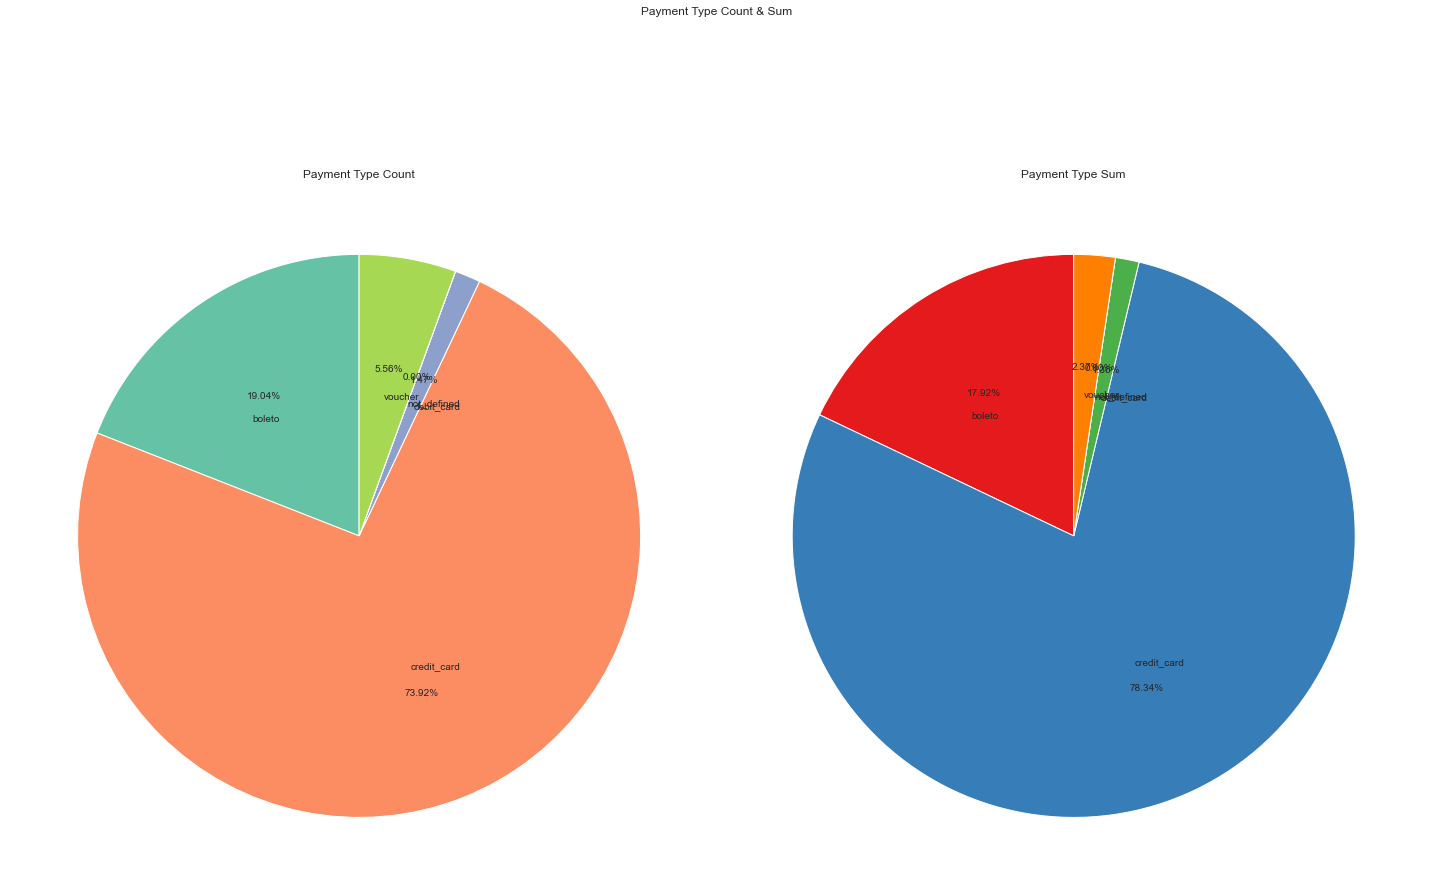

In [21]:
# order_payment values
payments = order_payment.groupby(['payment_type'])['payment_value'].agg(['count','sum']).reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols = 2,figsize=(20,15))
fig.suptitle('Payment Type Count & Sum')

ax1.pie(payments['count'], labels=payments['payment_type'], autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set2'),labeldistance=0.5, pctdistance=0.6)
ax1.set_title('Payment Type Count')
ax2.pie(payments['sum'], labels=payments['payment_type'], autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set1'),labeldistance=0.5, pctdistance=0.6)
ax2.set_title('Payment Type Sum')
plt.tight_layout()
plt.show()


In [22]:
# Monthly Revenue Plot
order_revenue = customers_order.groupby(['order_purchase_month'])['payment_value'].sum().reset_index()

#sns.lineplot(data = order_revenue)

order_revenue.head()
# plot monthly 

,order_purchase_month,payment_value
0,1.0,2.434648e+08
1,2.0,2.426560e+08
2,3.0,2.942632e+08
3,4.0,3.060640e+08
4,5.0,3.340303e+08


In [23]:
def bar_plot(df,col):
    # plot data in stack manner of bar type
    
    fig, ax = plt.subplots(figsize = (15,15))
    color = (0.2, # redness
             0.4, # greenness
             0.2, # blueness
             0.6 # transparency
             )

    ax.bar(
        x = df.index,
        height=df[col],
        tick_label=df.index,
        color = color
    )
    
    # First, let's remove the top, right and left spines (figure borders)
    # which really aren't necessary for a bar chart.
    # Also, make the bottom spine gray instead of black.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    # Second, remove the ticks as well.
    ax.tick_params(bottom=False, left=False)
    
    # Third, add a horizontal grid (but keep the vertical grid hidden).
    # Color the lines a light gray as well.
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)
    
    plt.show()
        

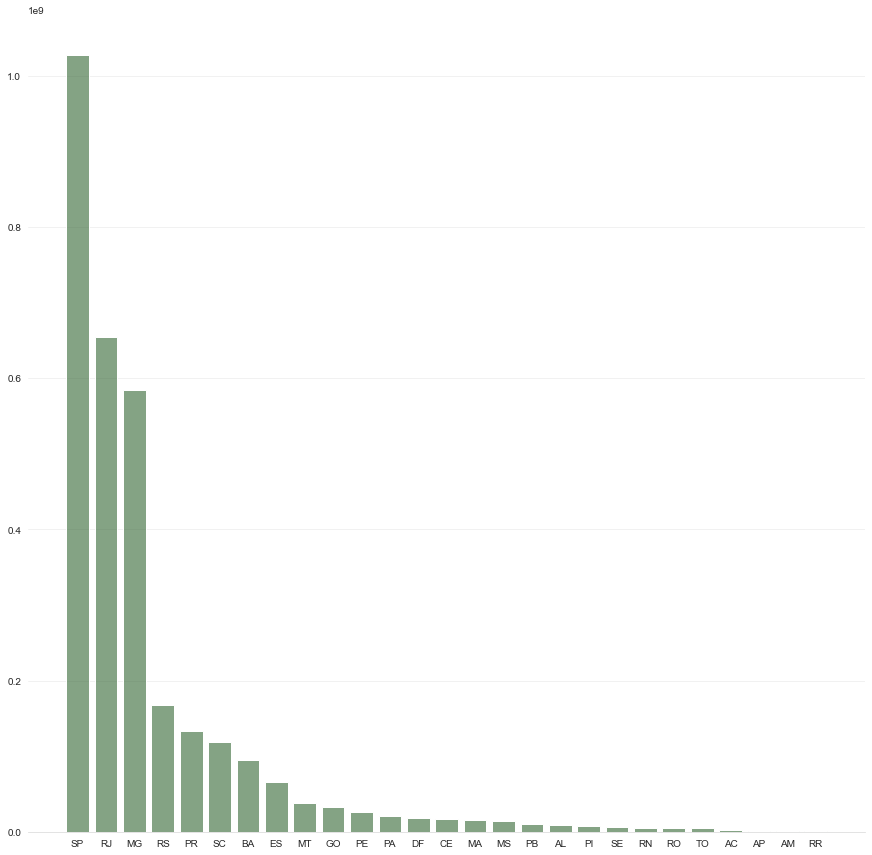

In [24]:
# payments per city
payments_geo = pd.pivot_table(customers_order, values = 'payment_value', index = ['customer_state'], columns = 'payment_type', aggfunc= 'sum')
payments_geo.fillna(0,inplace = True)
payments_geo['total'] = payments_geo['boleto'] + payments_geo['credit_card']+payments_geo['debit_card']+payments_geo['voucher']
payments_geo = payments_geo.sort_values(by = 'total', ascending= False)
# plot data in stack manner of bar type

bar_plot(payments_geo,'total')


In [25]:
# Top 20 Products Category
products_sales = customers_order.groupby(['product_category_name_english','product_id'])['payment_value'].agg(['count']).reset_index().sort_values(by = 'count', ascending= False)

products_sales.head(20)

,product_category_name_english,product_id,count
14061,furniture_decor,aca2eb7d00ea1a7b8ebd4e68314663af,86104
15285,garden_tools,422879e10f46682990de24d770e7f83d,80749
4962,bed_bath_table,99a4788cb24856965c36a24e339b6058,78076
15254,garden_tools,389d119b48cf3043d311335e499d9c6b,59887
7947,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,58375
15242,garden_tools,368c6c730842d78016ad823897a372db,58076
15347,garden_tools,53759a2ecddad2bb87a079a1f1519f73,52252
31250,watches_gifts,53b36df67ebb7c41585e8d54d6772e08,51470
16035,health_beauty,154e7e31ebfa092203795c972e5804a6,42606
7028,computers_accessories,3dd2a17168ec895c781a9191c1e95ad7,40600


### Order Status Analysis

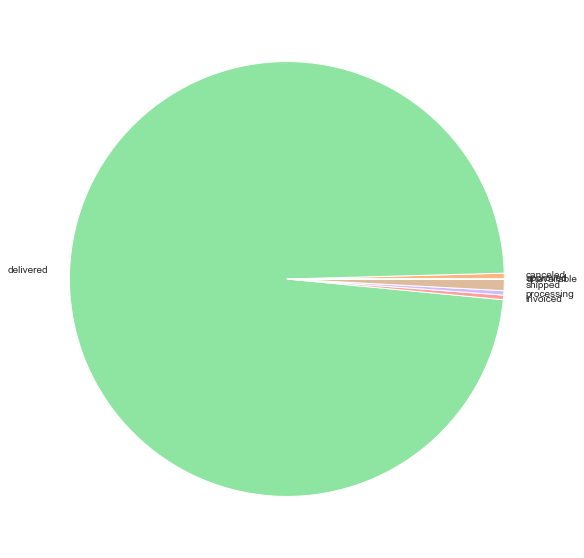

In [26]:
# Check delivery status
order_status = customers_order.groupby(['order_status'])['order_id'].agg(['count']).reset_index()
labels = order_status['order_status'].unique()
colors = sns.color_palette('pastel')[0:len(labels)]

plt.figure(figsize = (15,10))
plt.pie(order_status['count'], labels = labels, colors = colors)
plt.show()

In [27]:
customers_order.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'delivery_against_estima

In [29]:
customers_order['order_purchase_month'].head(20)

0     5.0
1     5.0
2     5.0
3     5.0
4     5.0
5     5.0
6     5.0
7     5.0
8     5.0
9     5.0
10    5.0
11    5.0
12    5.0
13    5.0
14    5.0
15    5.0
16    5.0
17    5.0
18    5.0
19    5.0
Name: order_purchase_month, dtype: float64

In [53]:
# Extraction 
sales_delivered = customers_order[customers_order['order_status'] == 'delivered'].copy(deep = True)
### Order Trend by Month ###
#set theme for all charts:
plt.style.use("seaborn-whitegrid")
sns.set_theme(style="whitegrid", palette="pastel")

#define a function to format chart:
def format_chart_trend(ax):
    ax.title.set_size(22)
    ax.xaxis.label.set_size(17)
    ax.yaxis.label.set_size(17)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)

#create df order_M to calculate no of delivered orders by month:    
ord_M=sales_delivered.pivot_table(values = ['order_id', 'price']
                              , index=['order_purchase_year','order_purchase_month','order_purchase_day']
                              , aggfunc={'order_id':'nunique','price':'sum'})

#sort data by timing (for purchase_MMYYY col):
ord_M = ord_M.sort_index(ascending=[1,1,1])
ord_M.reset_index(inplace = True)
del ord_M['purchase_year']
del ord_M['purchase_month']
ord_M.set_index('purchase_MMYYYY', inplace=True)
ord_M['revenue($R1000)']=ord_M['price']/1000
del ord_M['price']

#present data to line chart:
width = .45
fig = plt.figure()
ax1 = ord_M['revenue($R1000)'].plot(kind='bar', figsize=(20,7), width = width)
ax2 = ord_M['order_id'].plot(secondary_y=True, color='#007FD1')
ax1.set(ylabel='revenue ($R1000)')
ax1.set(title="Trend of Revenue ($R1000) & Orders by Month", xlabel="purchased month")
ax1.title.set_size(18)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)
ax1.xaxis.set_tick_params(labelsize=13)
ax1.yaxis.set_tick_params(labelsize=13)
ax2.yaxis.label.set_size(14)
ax2.yaxis.set_tick_params(labelsize=13)
ax2.set_ylabel('no of orders', rotation=-90, labelpad=20)
fig.legend(loc='upper right', fontsize=14)

#annotation of the peak point:
from datetime import datetime
peak = 'Peak of revenue & orders'
ax2.annotate(peak, xy=(13, 7289+50),
             xytext=(13, 7289 + 300),fontsize=15, color='red',
             arrowprops=dict(facecolor='#FC5190',shrink=0.05),
             horizontalalignment='left', verticalalignment='top')
plt.savefig('Trend of Revenue ($R1000) & Orders by Month', dpi=400, bbox_inches='tight');



,order_status,count
0,approved,658
1,canceled,74908
2,delivered,17315142
3,invoiced,59837
4,processing,57059
5,shipped,150020
6,unavailable,1241


In [29]:
customers_order.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'delivery_against_estima